<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>October 18, 2016: class
</small>
</div>
</p>
<br>
<div align="center">
<b>Abstract</b><br>
Lecture notes of today October 18, 2016, class, in Python.
</div>

In [2]:
from functools import lru_cache
import sys

sys.setrecursionlimit(10000000)

In [81]:
from sympy import *
from sympy.abc import n, k, alpha, beta

init_printing()

# Quicksort checks and swaps

In [4]:
checks_closed_form = Lambda([n], (2*n+2)*(harmonic(n+1)-1))
checks_closed_form

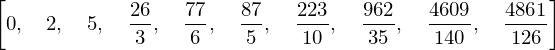

In [5]:
[checks_closed_form(n) for n in range(10)]

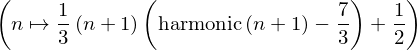

In [6]:
swaps_closed_form = Lambda([n], (n+1)*(harmonic(n+1) -Integer(7)/3)/3 + Integer(1)/2)
swaps_closed_form

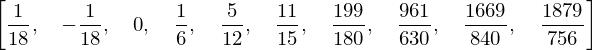

In [7]:
[swaps_closed_form(n) for n in range(10)]

# Fibonacci numbers

Take a look [here][doc] for `lru_cache` decorator in order to simulate `option=remember` as you could write in Maple:

[doc]:https://docs.python.org/3/library/functools.html#functools.lru_cache

In [37]:
initial_conditions = {0:0, 1:1}

def make_fibonacci(maxsize=None):
    '''Make the Fibonacci sequence using memoization of not (set `maxsize` arg to 0)'''
    
    @lru_cache(maxsize=maxsize)
    def fibonacci(n):
        return fibonacci(n-1)  + fibonacci(n-2) if n not in initial_conditions else initial_conditions[n]
    return fibonacci

In [32]:
%%timeit 
fibonacci_memoization = make_fibonacci(maxsize=None)
[fibonacci_memoization(n) for n in range(20)]

100000 loops, best of 3: 18.2 µs per loop


In [36]:
fibonacci_memoization.cache_info()

CacheInfo(hits=8222718, misses=501, maxsize=None, currsize=501)

In [33]:
%%timeit
fibonacci_naive = make_fibonacci(maxsize=0)
[fibonacci_naive(n) for n in range(20)]

100 loops, best of 3: 8.79 ms per loop


In [34]:
fibonacci_memoization(500)

In [ ]:
fibonacci_naive(500) # do not evaluate this, it takes too long

# Binomials

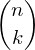

In [39]:
binomial(n, k)

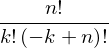

In [40]:
binomial(n, k).rewrite(factorial)

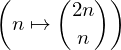

In [41]:
central_binomial = Lambda([n], binomial(2*n, n))
central_binomial

In [43]:
[central_binomial(n) for n in range(15)]

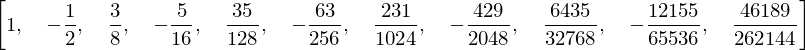

In [45]:
[binomial(-Integer(1)/2, n) for n in range(11)]

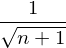

In [48]:
term = (1+n)**(-Integer(1)/2)
term

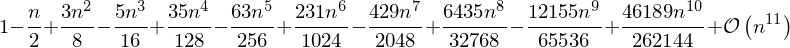

In [53]:
term.series(n, n=11)

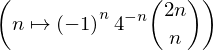

In [57]:
term = Lambda([n], (-1)**n*binomial(2*n, n)/4**n)
term

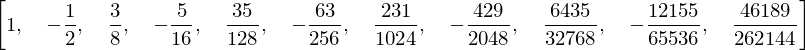

In [58]:
[term(n) for n in range(11)]

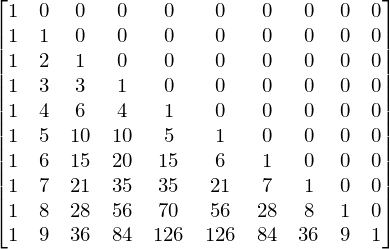

In [74]:
Matrix(10, 10, binomial)

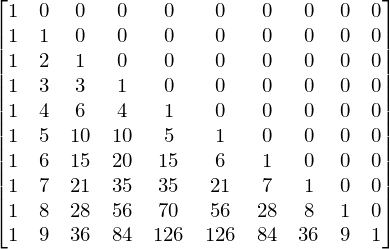

In [99]:
pascal = eye(10)
for i in range(1,10): 
    for j in range(i+1):
        pascal[i, j] = pascal[i-1, j-1] + pascal[i-1, j]

pascal

summing rows:

In [100]:
[sum(pascal[r, :]) for r in range(pascal.rows)]

summing anti-diagonals:

In [102]:
[sum(pascal[r-i, i] for i in range(r+1)) for r in range(pascal.rows)]

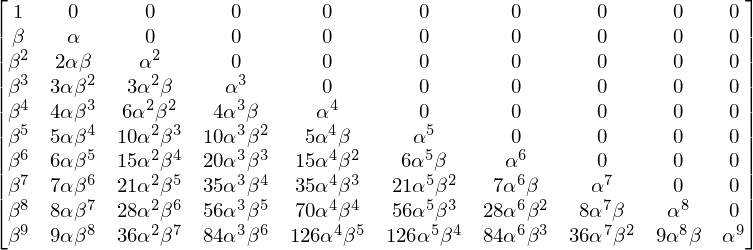

In [86]:
pascal_gen = eye(10)
for i in range(1,10): 
    for j in range(i+1):
        pascal_gen[i, j] = alpha*pascal_gen[i-1, j-1] + beta*pascal_gen[i-1, j]

pascal_gen

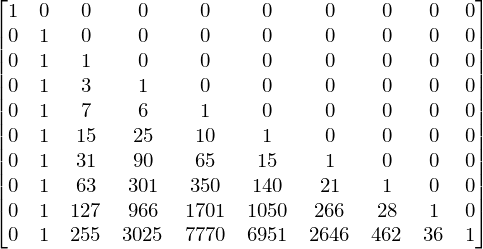

In [91]:
stirling_II = eye(10)
for i in range(1,10): 
    for j in range(i+1):
        stirling_II[i, j] = stirling_II[i-1, j-1] + j*stirling_II[i-1, j]

stirling_II

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.